Exercises from chapter 5!

**Exercise 1**: Suppose you are giving a talk in a large lecture hall and the fire marshal interrupts because they think the audience exceeds 1200 people, which is the safe capacity of the room.
You think there are fewer than 1200 people, and you offer to prove it. It would take too long to count, so you try an experiment:
* You ask how many people were born on May 11, and two people raise their hands.
* You ask how many were born on May 23 and 1 person raises their hand.
* Finally, you ask how many were born on August 1, and no one raises their hand.

How many people are in the audience? What is the probability that there are more than 1200 people? Hint: remember the binomial distribution.

Intuition: if there are 1200 people, there'd be an average of 1200 / 365 = 3.3 people with each birthday, so it's not likely that there are 1200 people.
Since the average is one person having a birthday on any given day (out of the three birthdays tested), there probably closer to 365 people in the lecture hall.

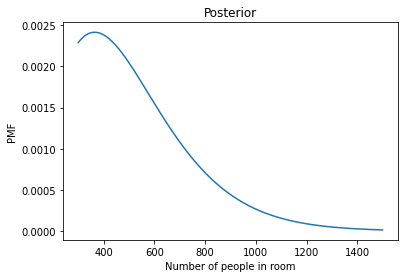

In [39]:
import numpy as np
from empiricaldist import Pmf
from scipy.stats import binom

# Choose uninformative prior
hypos = np.arange(300, 1500)
prior = Pmf(1, hypos)

def update_count(pmf, data):
    """Update pmf based on birthday counts"""
    hypos = pmf.qs
    p = (1 / 365)

    for m in data:
        # likelihood of m people having a given birthday for each value of hypos
        likelihood = binom.pmf(m, hypos, p)
        pmf *= likelihood
        pmf.normalize
    pmf.normalize()
    
posterior = prior.copy()

update_count(posterior, data = [2, 1, 0])

posterior.plot(xlabel = 'Number of people in room', ylabel = 'PMF', title = 'Posterior');

In [40]:
posterior.max_prob(), posterior.mean(), posterior.prob_ge(1201)



(365, 566.7069533176127, 0.01248652967252168)

In [46]:
## So the most likely value is 365, and based on our prior, the mean number of people is 567 and it's not likely (one-in-eight) that there's more than 1200 people.
# If we'd selected a lower bound to the prior, that number would be even lower

hypos = np.arange(200, 1500)
prior_2 = Pmf(1, hypos)
posterior_2 = prior_2.copy()
update_count(posterior_2, data = [2, 1, 0])

posterior_2.max_prob(), posterior_2.mean(), posterior_2.prob_ge(1201)

#posterior_2.plot(xlabel = 'Number of people in room', ylabel = 'PMF', title = 'Posterior_2');

(365, 515.1421740811313, 0.010436079599684917)

**Exercise 2**: I often see rabbits in the backyard of my apartment, but it's not easy to tell them apart, so I don't really know how many there are.

Suppose I deploy a motion-sensing camera trp that takes a pictures of the first rabbit I see each day. After three days, I campare the pictures and conclude that two of them are the same rabbit and the other is different.

How many rabbits visit my backyard?

To answer this question, we have the think about the prior distribution and the likelihood of the data:

* I've sometimes seen four rabbits at the same time, so I know there are at least that many. I'd be surprised if there were more than 10. So, as a starting place, a uniform prior from 4 to 10 is reasonable.

* To keep things simple, let's assume that all rabbits who visit my garden are equally likely to be caught by the camera trap in a given day. Let's also assume it is guaranteed that the camera trap gets a picture every day.

For each `n`, there's `n^3` possible outcomes. In `n` of them, you see the same rabbit three times. In `n * (n-1) * (n-2)` of them, you see three different rabbits. All other situations, you see one rabbit twice and one time you see another rabbit, as in the scenario being asked about.

Therefore, for a given `n`, the prob. of seeing the scenario described is `(n^3 - (n(n-1)(n-2) + n))/(n^3)`, which simplifies to `3(n - 1) / n^2`.

It makes sense, then, that the likelihood of seeing the first rabbit twice goes down when you have a larger population.

(4, 6.5099298137481725)

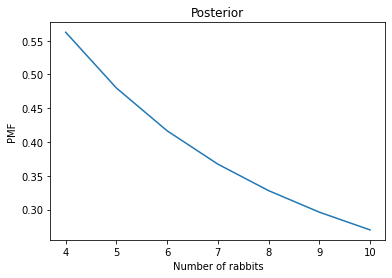

In [12]:
import numpy as np
from empiricaldist import Pmf

hypos = np.arange(4, 11)
prior = Pmf(1, hypos)

likelihood = 3 * (hypos - 1) / (hypos ** 2)

posterior = prior.copy()

posterior *= likelihood

posterior.plot(xlabel = 'Number of rabbits', ylabel = 'PMF', title = 'Posterior');

posterior.normalize()
posterior.max_prob(), posterior.mean()

Mean is 6.5, so best guess is 6 or 7 rabbits in the population.